<a href="https://colab.research.google.com/github/jenfranx30/savemate-docs/blob/main/BIMA_Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**K-Means Clustering - Unsupervised Learning Lab**

Biologically Inspired Methods and Algorithms

Student: Jenefer Yago - 60954

**This script covers:**

1.   Task 1: K-Means with sklearn (elbow method, silhouette analysis)
2.   Task 2: K-Means with TensorFlow
3.   Task 3: K-Means on Iris dataset

In [1]:
!pip install tensorflow scikit-learn matplotlib seaborn pandas

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs, load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler
from matplotlib import cm
import warnings
warnings.filterwarnings('ignore')

In [3]:
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

print("="*80)
print("K-MEANS CLUSTERING - UNSUPERVISED LEARNING LAB")
print("="*80)

K-MEANS CLUSTERING - UNSUPERVISED LEARNING LAB


**Task 1: K-Means Clustering with Sklearn**

Generate sample data

In [4]:
print("\nGenerating sample data...")
np.random.seed(0)

X_3clusters, y_3clusters = make_blobs(
    n_samples=150,
    n_features=2,
    centers=3,
    cluster_std=0.5,
    shuffle=True,
    random_state=0
)

print(f" Generated data shape: {X_3clusters.shape}")
print(f" Number of samples: {X_3clusters.shape[0]}")
print(f" Number of features: {X_3clusters.shape[1]}")


Generating sample data...
 Generated data shape: (150, 2)
 Number of samples: 150
 Number of features: 2


Visualize generated data

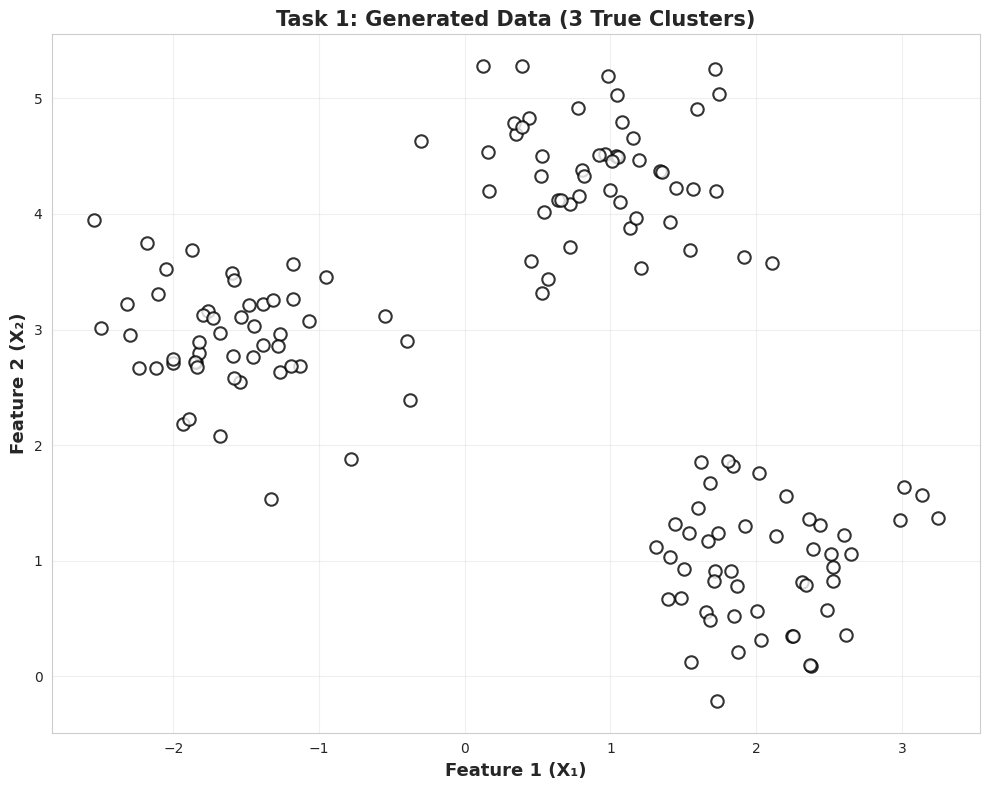

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
ax.scatter(X_3clusters[:, 0], X_3clusters[:, 1],
           c='white', marker='o', edgecolor='black', s=80, linewidths=1.5, alpha=0.8)
ax.set_xlabel('Feature 1 (X₁)', fontsize=13, fontweight='bold')
ax.set_ylabel('Feature 2 (X₂)', fontsize=13, fontweight='bold')
ax.set_title('Task 1: Generated Data (3 True Clusters)', fontsize=15, fontweight='bold')
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('task1_generated_data.png', dpi=300, bbox_inches='tight')
plt.show()

Apply K-Means Clustering (For example: k=3)

In [6]:
km_3 = KMeans(
    n_clusters=3,
    init='random',
    n_init=10,
    max_iter=300,
    tol=1e-04,
    random_state=0
)

y_km = km_3.fit_predict(X_3clusters)

print(f" Clustering completed")
print(f" Distortion (Inertia): {km_3.inertia_:.2f}")
print(f" Number of iterations: {km_3.n_iter_}")
print(f" Centroids:\n{km_3.cluster_centers_}")


 Clustering completed
 Distortion (Inertia): 72.48
 Number of iterations: 4
 Centroids:
[[-1.5947298   2.92236966]
 [ 0.9329651   4.35420712]
 [ 2.06521743  0.96137409]]


Visualize clustering results

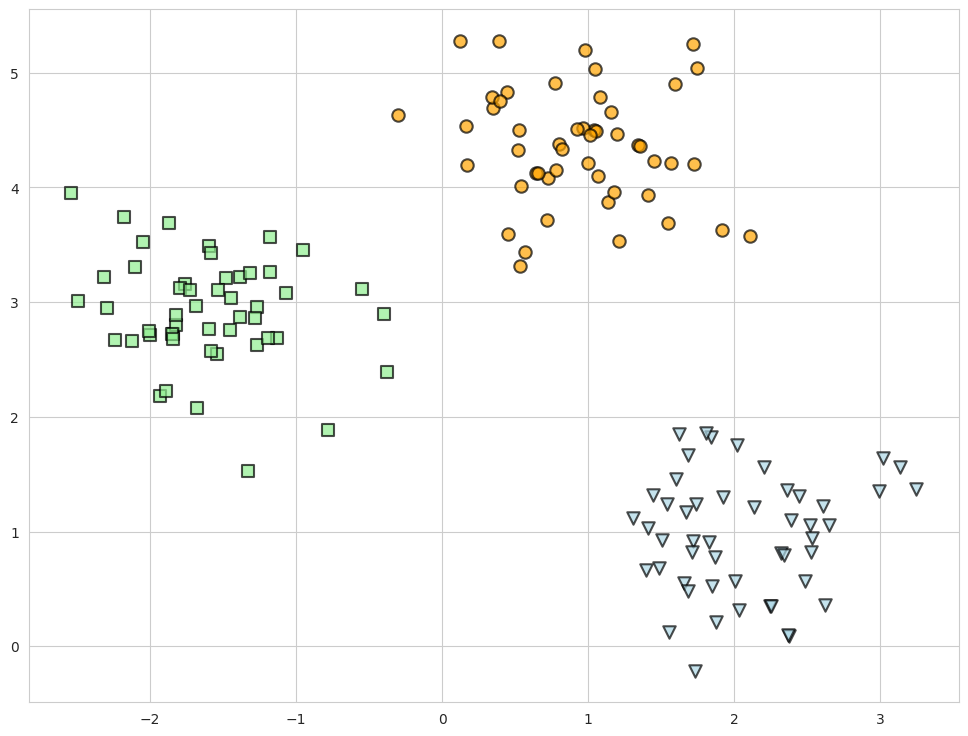

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(12, 9))

colors = ['lightgreen', 'orange', 'lightblue']
markers = ['s', 'o', 'v']
labels = ['Cluster 1', 'Cluster 2', 'Cluster 3']

for i in range(3):
    ax.scatter(X_3clusters[y_km == i, 0], X_3clusters[y_km == i, 1],
               s=80, c=colors[i], marker=markers[i],
               edgecolor='black', label=labels[i], alpha=0.7, linewidths=1.5)

Plot centroids

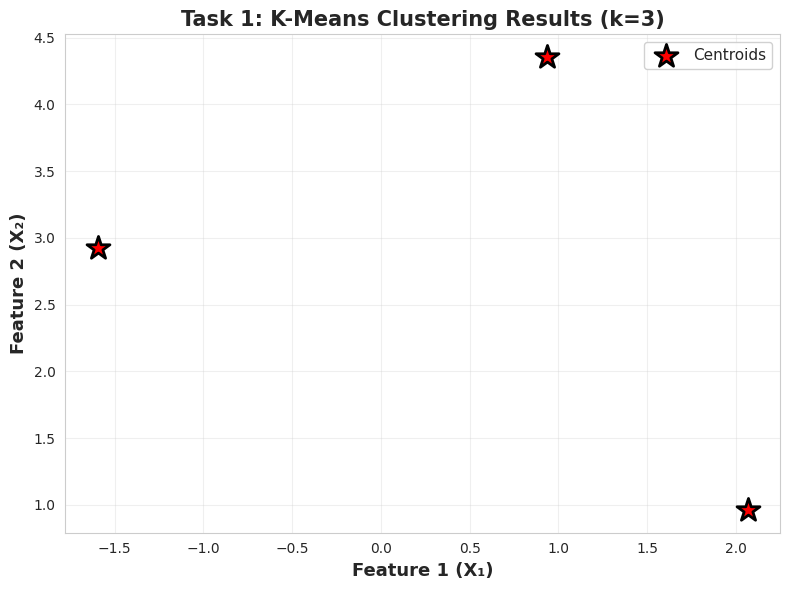

In [13]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.scatter(km_3.cluster_centers_[:, 0], km_3.cluster_centers_[:, 1],
           s=300, marker='*', c='red', edgecolor='black',
           label='Centroids', linewidths=2, zorder=10)

ax.set_xlabel('Feature 1 (X₁)', fontsize=13, fontweight='bold')
ax.set_ylabel('Feature 2 (X₂)', fontsize=13, fontweight='bold')
ax.set_title('Task 1: K-Means Clustering Results (k=3)', fontsize=15, fontweight='bold')
ax.legend(scatterpoints=1, loc='best', fontsize=11, framealpha=0.9)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('task1_kmeans_result.png', dpi=300, bbox_inches='tight')
plt.show()

Elbow Method

In [10]:
print("\nApplying Elbow Method to determine optimal k...")

distortions = []
K_range = range(1, 11)

for k in K_range:
    km = KMeans(
        n_clusters=k,
        init='k-means++',
        n_init=10,
        max_iter=300,
        random_state=0
    )
    km.fit(X_3clusters)
    distortions.append(km.inertia_)
    print(f"  k={k:2d}: Distortion = {km.inertia_:7.2f}")


Applying Elbow Method to determine optimal k...
  k= 1: Distortion =  713.70
  k= 2: Distortion =  283.46
  k= 3: Distortion =   72.48
  k= 4: Distortion =   62.88
  k= 5: Distortion =   54.27
  k= 6: Distortion =   47.53
  k= 7: Distortion =   39.81
  k= 8: Distortion =   35.44
  k= 9: Distortion =   30.76
  k=10: Distortion =   28.07


Plot Elbow curve and Annotate elbow point

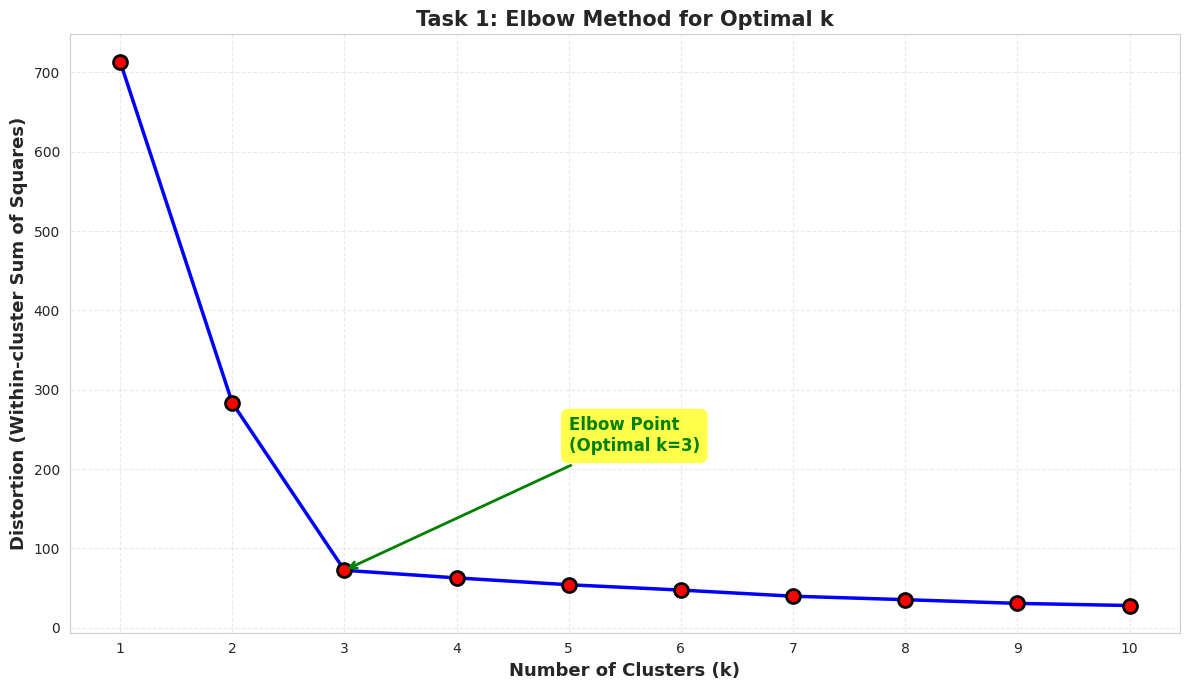


 Optimal k appears to be 3 (elbow point)


In [19]:
fig, ax = plt.subplots(1, 1, figsize=(12, 7))
ax.plot(K_range, distortions, 'b-o', linewidth=2.5, markersize=10,
        markerfacecolor='red', markeredgecolor='black', markeredgewidth=2)
ax.set_xlabel('Number of Clusters (k)', fontsize=13, fontweight='bold')
ax.set_ylabel('Distortion (Within-cluster Sum of Squares)', fontsize=13, fontweight='bold')
ax.set_title('Task 1: Elbow Method for Optimal k', fontsize=15, fontweight='bold')
ax.grid(True, alpha=0.4, linestyle='--')
ax.set_xticks(K_range)

# Annotate elbow point

ax.annotate('Elbow Point\n(Optimal k=3)',
            xy=(3, distortions[2]),
            xytext=(5, distortions[2] + 150),
            arrowprops=dict(arrowstyle='->', lw=2, color='green'),
            fontsize=12, fontweight='bold', color='green',
            bbox=dict(boxstyle='round,pad=0.5', facecolor='yellow', alpha=0.7))

plt.tight_layout()
plt.savefig('task1_elbow_method.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\n Optimal k appears to be 3 (elbow point)")

Silhouette Analysis for different k values

  k=3: Average Silhouette Score = 0.7143
  k=4: Average Silhouette Score = 0.5740
  k=5: Average Silhouette Score = 0.4375
  k=6: Average Silhouette Score = 0.4635


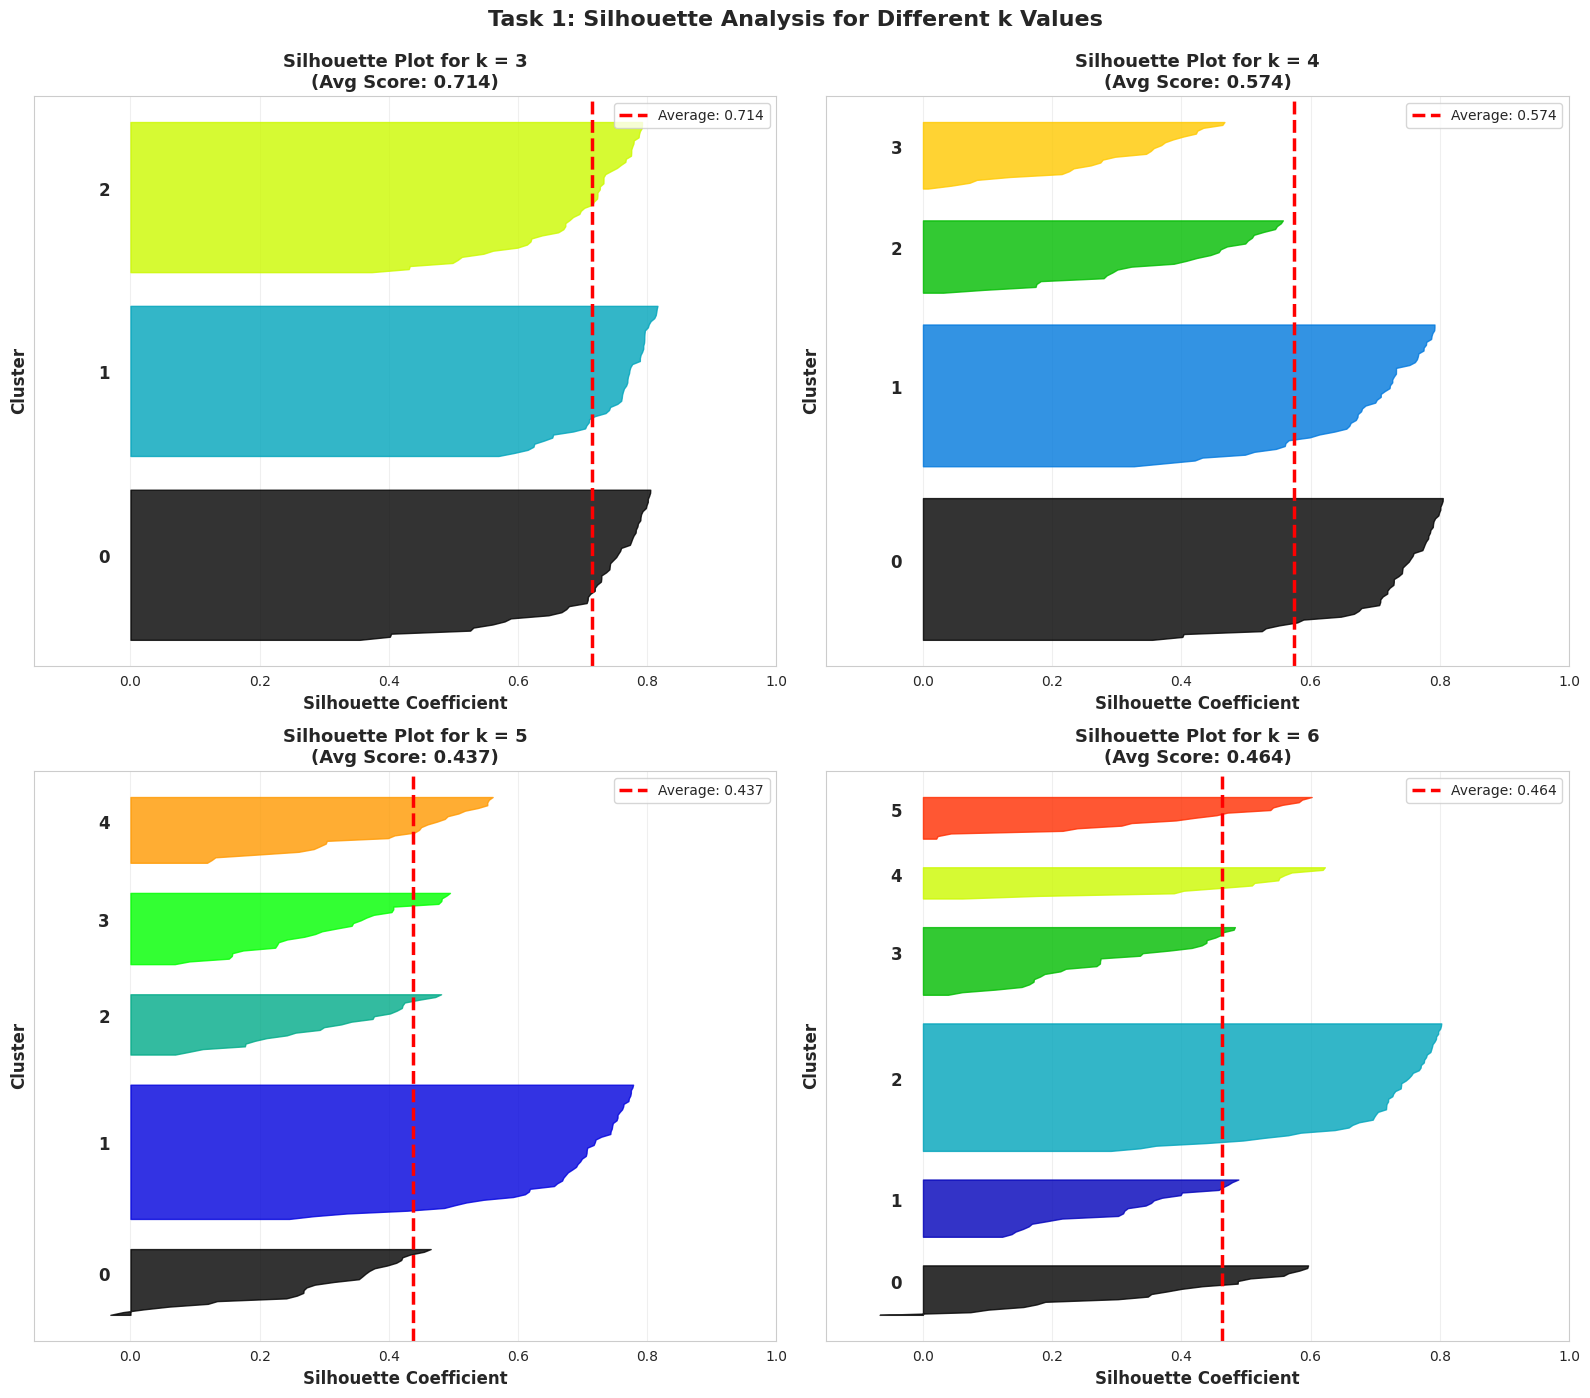


 Best silhouette score: k=3 (score: 0.7143)


In [20]:
fig, axes = plt.subplots(2, 2, figsize=(16, 14))
axes = axes.ravel()

k_values = [3, 4, 5, 6]
silhouette_scores = []

for idx, k in enumerate(k_values):
    ax = axes[idx]

    km = KMeans(n_clusters=k, init='k-means++', n_init=10,
                max_iter=300, random_state=0)
    cluster_labels = km.fit_predict(X_3clusters)

    silhouette_avg = silhouette_score(X_3clusters, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    sample_silhouette_values = silhouette_samples(X_3clusters, cluster_labels)

    print(f"  k={k}: Average Silhouette Score = {silhouette_avg:.4f}")

    y_lower = 10

    for i in range(k):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / k)
        ax.fill_betweenx(np.arange(y_lower, y_upper),
                         0, ith_cluster_silhouette_values,
                         facecolor=color, edgecolor=color, alpha=0.8)

        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i),
                fontsize=12, fontweight='bold')

        y_lower = y_upper + 10

    ax.set_title(f'Silhouette Plot for k = {k}\n(Avg Score: {silhouette_avg:.3f})',
                 fontsize=13, fontweight='bold')
    ax.set_xlabel('Silhouette Coefficient', fontsize=12, fontweight='bold')
    ax.set_ylabel('Cluster', fontsize=12, fontweight='bold')

    ax.axvline(x=silhouette_avg, color="red", linestyle="--", linewidth=2.5,
               label=f'Average: {silhouette_avg:.3f}')

    ax.set_yticks([])
    ax.set_xlim([-0.15, 1])
    ax.legend(loc='upper right', fontsize=10)
    ax.grid(True, alpha=0.3, axis='x')

plt.suptitle('Task 1: Silhouette Analysis for Different k Values',
             fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.savefig('task1_silhouette_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\n Best silhouette score: k={k_values[np.argmax(silhouette_scores)]} "
      f"(score: {max(silhouette_scores):.4f})")


Additional analysis with 5 clusters

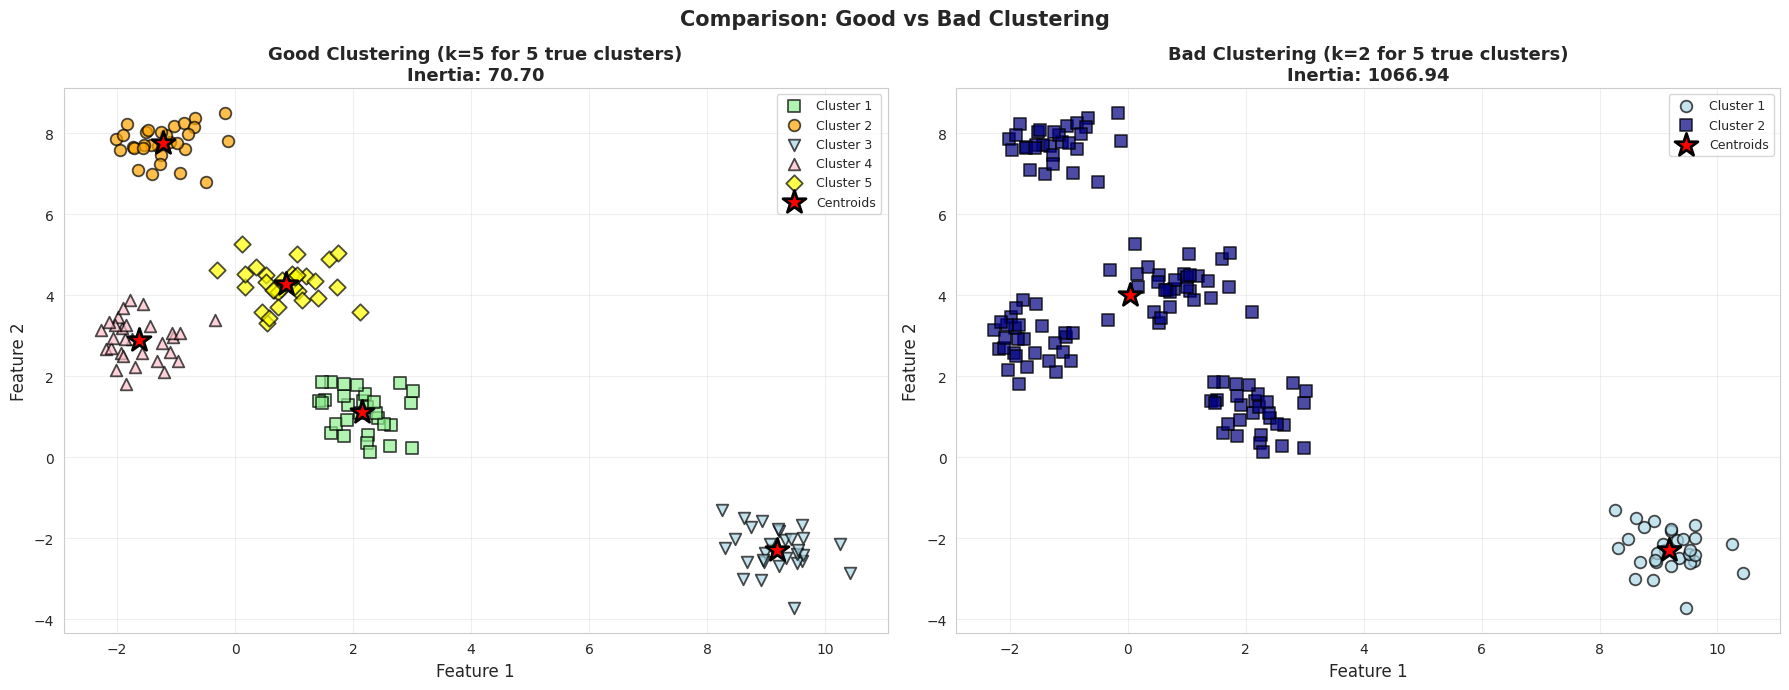

 Good clustering (k=5): Inertia = 70.70
 Bad clustering (k=2): Inertia = 1066.94


In [23]:
X_5clusters, y_5clusters = make_blobs(
    n_samples=150,
    n_features=2,
    centers=5,
    cluster_std=0.5,
    shuffle=True,
    random_state=0
)

# Elbow method for 5-cluster data
distortions_5 = []
for k in K_range:
    km = KMeans(n_clusters=k, init='k-means++', n_init=10,
                max_iter=300, random_state=0)
    km.fit(X_5clusters)
    distortions_5.append(km.inertia_)

# Comparison plot
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Good clustering (k=5)
km_good = KMeans(n_clusters=5, init='k-means++', n_init=10,
                 max_iter=300, random_state=0)
y_good = km_good.fit_predict(X_5clusters)

colors_5 = ['lightgreen', 'orange', 'lightblue', 'pink', 'yellow']
markers_5 = ['s', 'o', 'v', '^', 'D']

for i in range(5):
    axes[0].scatter(X_5clusters[y_good == i, 0], X_5clusters[y_good == i, 1],
                    s=70, c=colors_5[i], marker=markers_5[i],
                    edgecolor='black', alpha=0.7, linewidths=1.3,
                    label=f'Cluster {i+1}')

axes[0].scatter(km_good.cluster_centers_[:, 0], km_good.cluster_centers_[:, 1],
                s=300, marker='*', c='red', edgecolor='black',
                linewidths=2, label='Centroids', zorder=10)
axes[0].set_title('Good Clustering (k=5 for 5 true clusters)\n' +
                  f'Inertia: {km_good.inertia_:.2f}',
                  fontsize=13, fontweight='bold')
axes[0].set_xlabel('Feature 1', fontsize=12)
axes[0].set_ylabel('Feature 2', fontsize=12)
axes[0].legend(fontsize=9, loc='best')
axes[0].grid(True, alpha=0.3)

# Bad clustering (k=2)
km_bad = KMeans(n_clusters=2, init='k-means++', n_init=10,
                max_iter=300, random_state=0)
y_bad = km_bad.fit_predict(X_5clusters)

axes[1].scatter(X_5clusters[y_bad == 0, 0], X_5clusters[y_bad == 0, 1],
                s=70, c='lightblue', marker='o', edgecolor='black',
                alpha=0.7, linewidths=1.3, label='Cluster 1')
axes[1].scatter(X_5clusters[y_bad == 1, 0], X_5clusters[y_bad == 1, 1],
                s=70, c='navy', marker='s', edgecolor='black',
                alpha=0.7, linewidths=1.3, label='Cluster 2')
axes[1].scatter(km_bad.cluster_centers_[:, 0], km_bad.cluster_centers_[:, 1],
                s=300, marker='*', c='red', edgecolor='black',
                linewidths=2, label='Centroids', zorder=10)
axes[1].set_title('Bad Clustering (k=2 for 5 true clusters)\n' +
                  f'Inertia: {km_bad.inertia_:.2f}',
                  fontsize=13, fontweight='bold')
axes[1].set_xlabel('Feature 1', fontsize=12)
axes[1].set_ylabel('Feature 2', fontsize=12)
axes[1].legend(fontsize=9, loc='best')
axes[1].grid(True, alpha=0.3)

plt.suptitle('Comparison: Good vs Bad Clustering', fontsize=15, fontweight='bold')
plt.tight_layout()
plt.savefig('task1_good_vs_bad_clustering.png', dpi=300, bbox_inches='tight')
plt.show()

print(f" Good clustering (k=5): Inertia = {km_good.inertia_:.2f}")
print(f" Bad clustering (k=2): Inertia = {km_bad.inertia_:.2f}")

**Task 2: K-Means in TensorFlow**


TASK 2: K-MEANS IN TENSORFLOW

[Task 2] Implementing K-Means with TensorFlow...
 Generated 200 random points
 Number of clusters: 3
 Number of iterations: 100


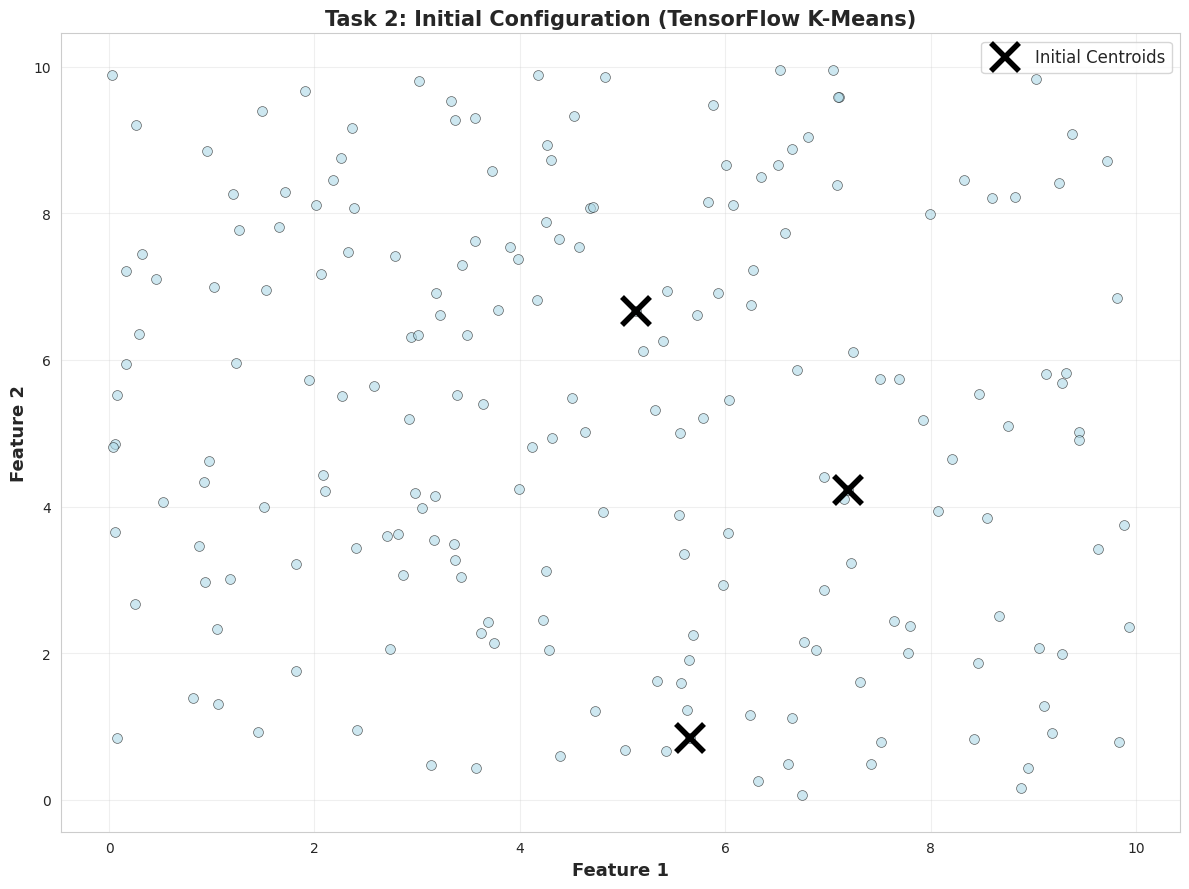


 Running 100 iterations...
  Iteration  20: SSE = 1183.98
  Iteration  40: SSE = 1183.98
  Iteration  60: SSE = 1183.98
  Iteration  80: SSE = 1183.98
  Iteration 100: SSE = 1183.98

 Final SSE: 1183.98


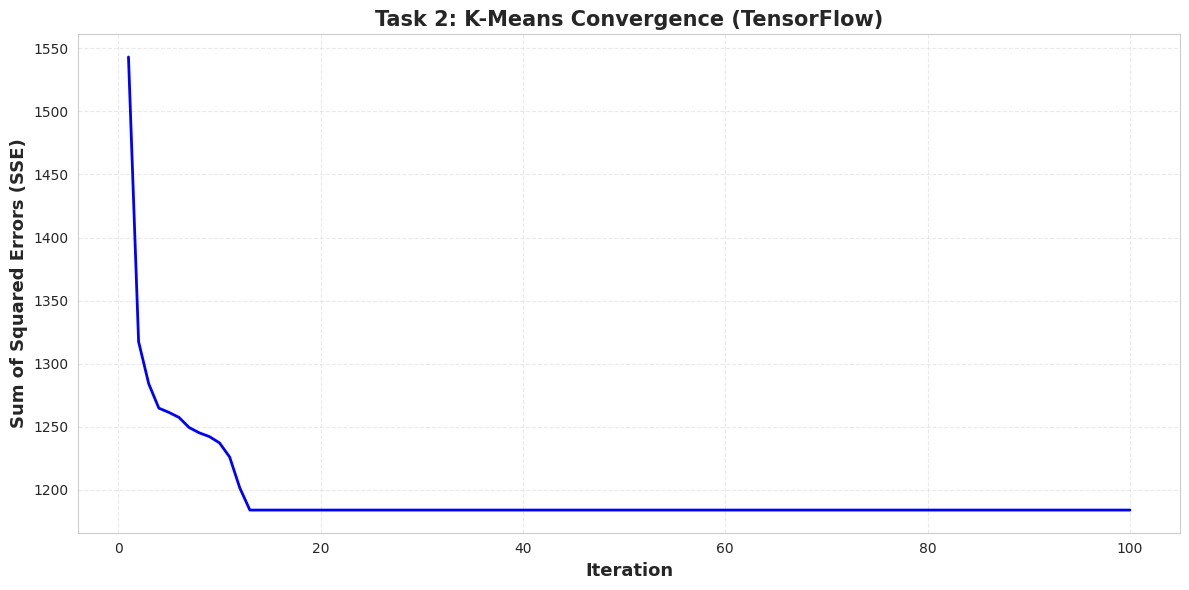

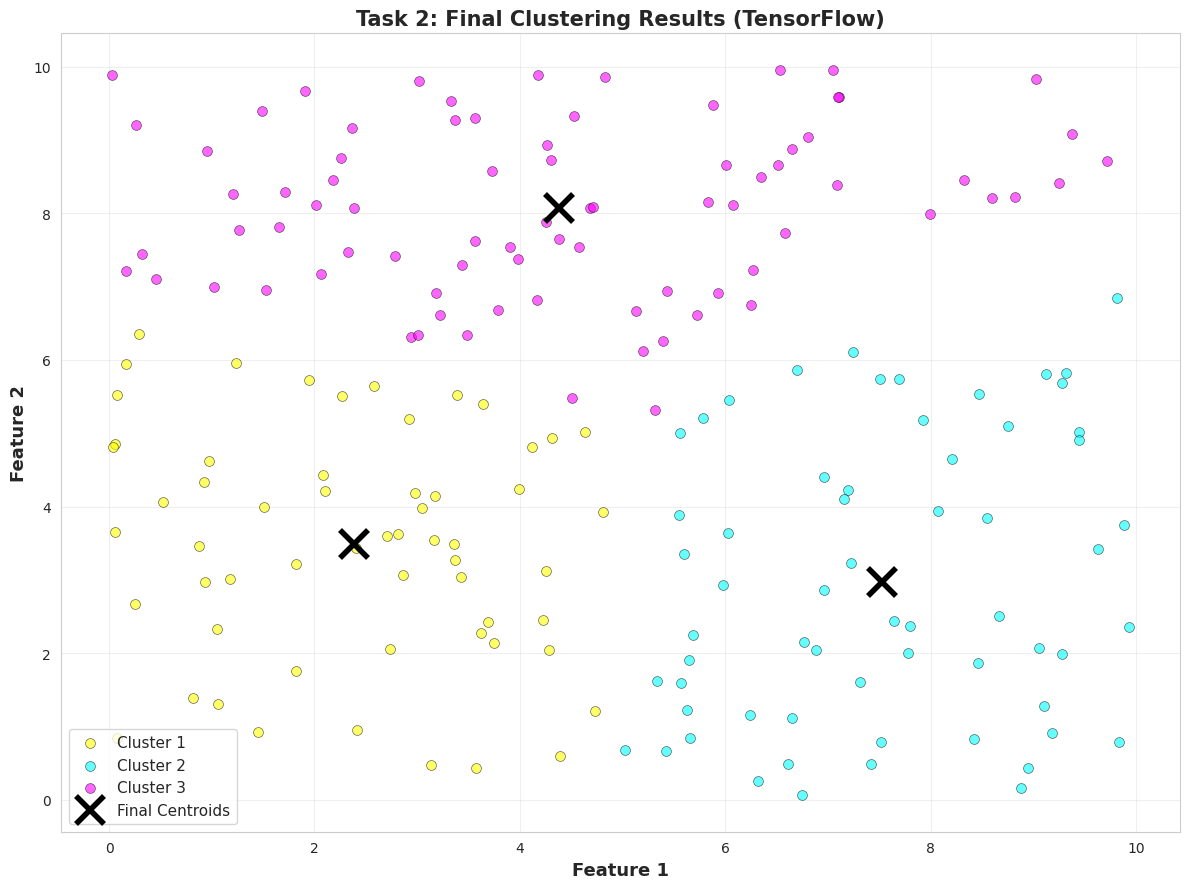


[Task 2] Elbow Method with TensorFlow...
  k= 1: SSE = 3396.21
  k= 2: SSE = 2186.13
  k= 3: SSE = 1244.27
  k= 4: SSE = 1071.10
  k= 5: SSE = 691.78
  k= 6: SSE = 516.90
  k= 7: SSE = 479.70
  k= 8: SSE = 416.58
  k= 9: SSE = 378.24
  k=10: SSE = 375.43


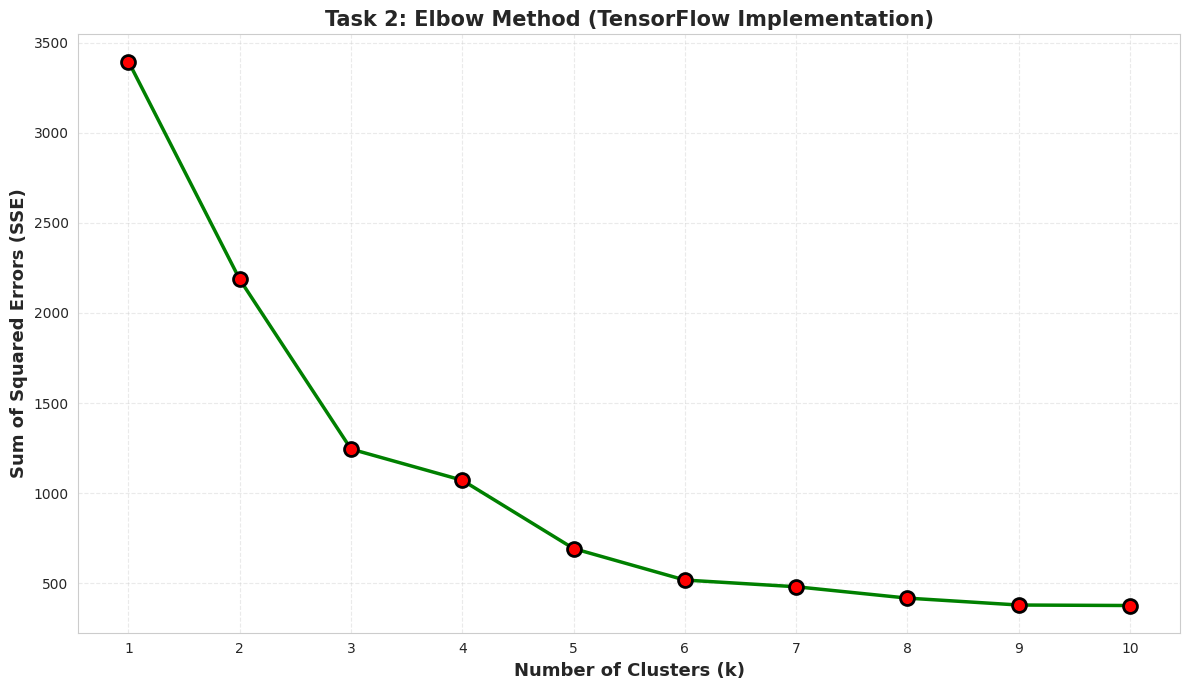

In [24]:
print("\n" + "="*80)
print("TASK 2: K-MEANS IN TENSORFLOW")
print("="*80)

try:
    import tensorflow as tf

    print("\n[Task 2] Implementing K-Means with TensorFlow...")

    # Parameters
    points_n = 200
    clusters_n = 3
    iteration_n = 100
    seed = 123

    np.random.seed(seed)
    tf.random.set_seed(seed)

    # Generate random data
    points = np.random.uniform(0, 10, (points_n, 2))

    # Select centroids randomly
    centroids = tf.slice(tf.random.shuffle(points), [0, 0], [clusters_n, -1])
    centroids = centroids.numpy()

    print(f" Generated {points_n} random points")
    print(f" Number of clusters: {clusters_n}")
    print(f" Number of iterations: {iteration_n}")

    # Plot initial configuration
    plt.figure(figsize=(12, 9))
    plt.scatter(points[:, 0], points[:, 1], s=50, alpha=0.6,
                c='lightblue', edgecolor='black', linewidths=0.5)
    plt.plot(centroids[:, 0], centroids[:, 1], 'kx',
             markersize=20, mew=4, label='Initial Centroids')
    plt.xlabel('Feature 1', fontsize=13, fontweight='bold')
    plt.ylabel('Feature 2', fontsize=13, fontweight='bold')
    plt.title('Task 2: Initial Configuration (TensorFlow K-Means)',
              fontsize=15, fontweight='bold')
    plt.legend(fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig('task2_initial_config.png', dpi=300, bbox_inches='tight')
    plt.show()

    # Define functions
    def closest_centroids(points, centroids):
        """Assign each point to the closest centroid"""
        distances = tf.reduce_sum(tf.square(tf.subtract(points, centroids[:, None])), 2)
        assignments = tf.argmin(distances, 0)
        return assignments

    def move_centroids(points, closest, centroids):
        """Recalculate centroids to minimize SSE"""
        return np.array([points[closest == k].mean(axis=0)
                        for k in range(centroids.shape[0])])

    # Run K-Means iterations
    print(f"\n Running {iteration_n} iterations...")

    sse_history = []

    for step in range(iteration_n):
        closest = closest_centroids(points, centroids)
        centroids = move_centroids(points, closest.numpy(), centroids)

        # Calculate SSE
        sse = 0
        for k in range(clusters_n):
            cluster_points = points[closest.numpy() == k]
            if len(cluster_points) > 0:
                sse += np.sum((cluster_points - centroids[k])**2)
        sse_history.append(sse)

        if (step + 1) % 20 == 0:
            print(f"  Iteration {step + 1:3d}: SSE = {sse:.2f}")

    print(f"\n Final SSE: {sse_history[-1]:.2f}")

    # Plot convergence
    plt.figure(figsize=(12, 6))
    plt.plot(range(1, iteration_n + 1), sse_history, 'b-', linewidth=2)
    plt.xlabel('Iteration', fontsize=13, fontweight='bold')
    plt.ylabel('Sum of Squared Errors (SSE)', fontsize=13, fontweight='bold')
    plt.title('Task 2: K-Means Convergence (TensorFlow)', fontsize=15, fontweight='bold')
    plt.grid(True, alpha=0.4, linestyle='--')
    plt.tight_layout()
    plt.savefig('task2_convergence.png', dpi=300, bbox_inches='tight')
    plt.show()

    # Final clustering visualization
    plt.figure(figsize=(12, 9))

    colors_tf = ['yellow', 'cyan', 'magenta']

    for i in range(clusters_n):
        cluster_points = points[closest.numpy() == i]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1],
                   s=50, c=colors_tf[i], marker='o',
                   edgecolor='black', alpha=0.6, linewidths=0.5,
                   label=f'Cluster {i+1}')

    plt.plot(centroids[:, 0], centroids[:, 1], 'kx',
            markersize=20, mew=4, label='Final Centroids')
    plt.xlabel('Feature 1', fontsize=13, fontweight='bold')
    plt.ylabel('Feature 2', fontsize=13, fontweight='bold')
    plt.title('Task 2: Final Clustering Results (TensorFlow)',
              fontsize=15, fontweight='bold')
    plt.legend(fontsize=11)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig('task2_final_clustering.png', dpi=300, bbox_inches='tight')
    plt.show()

    # Elbow method for TensorFlow implementation
    print("\n[Task 2] Elbow Method with TensorFlow...")

    sse_list = []
    k_range_tf = range(1, 11)

    for k in k_range_tf:
        points_temp = np.random.uniform(0, 10, (points_n, 2))
        centroids_temp = tf.slice(tf.random.shuffle(points_temp), [0, 0], [k, -1]).numpy()

        for _ in range(50):  # Fewer iterations for speed
            closest_temp = closest_centroids(points_temp, centroids_temp)
            centroids_temp = move_centroids(points_temp, closest_temp.numpy(), centroids_temp)

        sse = 0
        for i in range(k):
            cluster_points = points_temp[closest_temp.numpy() == i]
            if len(cluster_points) > 0:
                sse += np.sum((cluster_points - centroids_temp[i])**2)
        sse_list.append(sse)
        print(f"  k={k:2d}: SSE = {sse:.2f}")

    plt.figure(figsize=(12, 7))
    plt.plot(k_range_tf, sse_list, 'g-o', linewidth=2.5, markersize=10,
            markerfacecolor='red', markeredgecolor='black', markeredgewidth=2)
    plt.xlabel('Number of Clusters (k)', fontsize=13, fontweight='bold')
    plt.ylabel('Sum of Squared Errors (SSE)', fontsize=13, fontweight='bold')
    plt.title('Task 2: Elbow Method (TensorFlow Implementation)',
              fontsize=15, fontweight='bold')
    plt.grid(True, alpha=0.4, linestyle='--')
    plt.xticks(k_range_tf)
    plt.tight_layout()
    plt.savefig('task2_elbow_method.png', dpi=300, bbox_inches='tight')
    plt.show()

except ImportError:
    print("\n TensorFlow not installed. Skipping Task 2.")
    print("  Install with: !pip install tensorflow")

**TASK 3: K-MEANS ON IRIS DATASET**

In [25]:
print("\n[Task 3] Loading and exploring Iris dataset...")

# Load Iris dataset
iris = load_iris()
X_iris = iris.data
y_iris = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

print(f" Dataset shape: {X_iris.shape}")
print(f" Features: {feature_names}")
print(f" Target classes: {target_names}")
print(f" Class distribution: {np.bincount(y_iris)}")


[Task 3] Loading and exploring Iris dataset...
 Dataset shape: (150, 4)
 Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
 Target classes: ['setosa' 'versicolor' 'virginica']
 Class distribution: [50 50 50]


Create DataFrame for better visualization


 First 5 samples:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  

 Statistical summary:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800

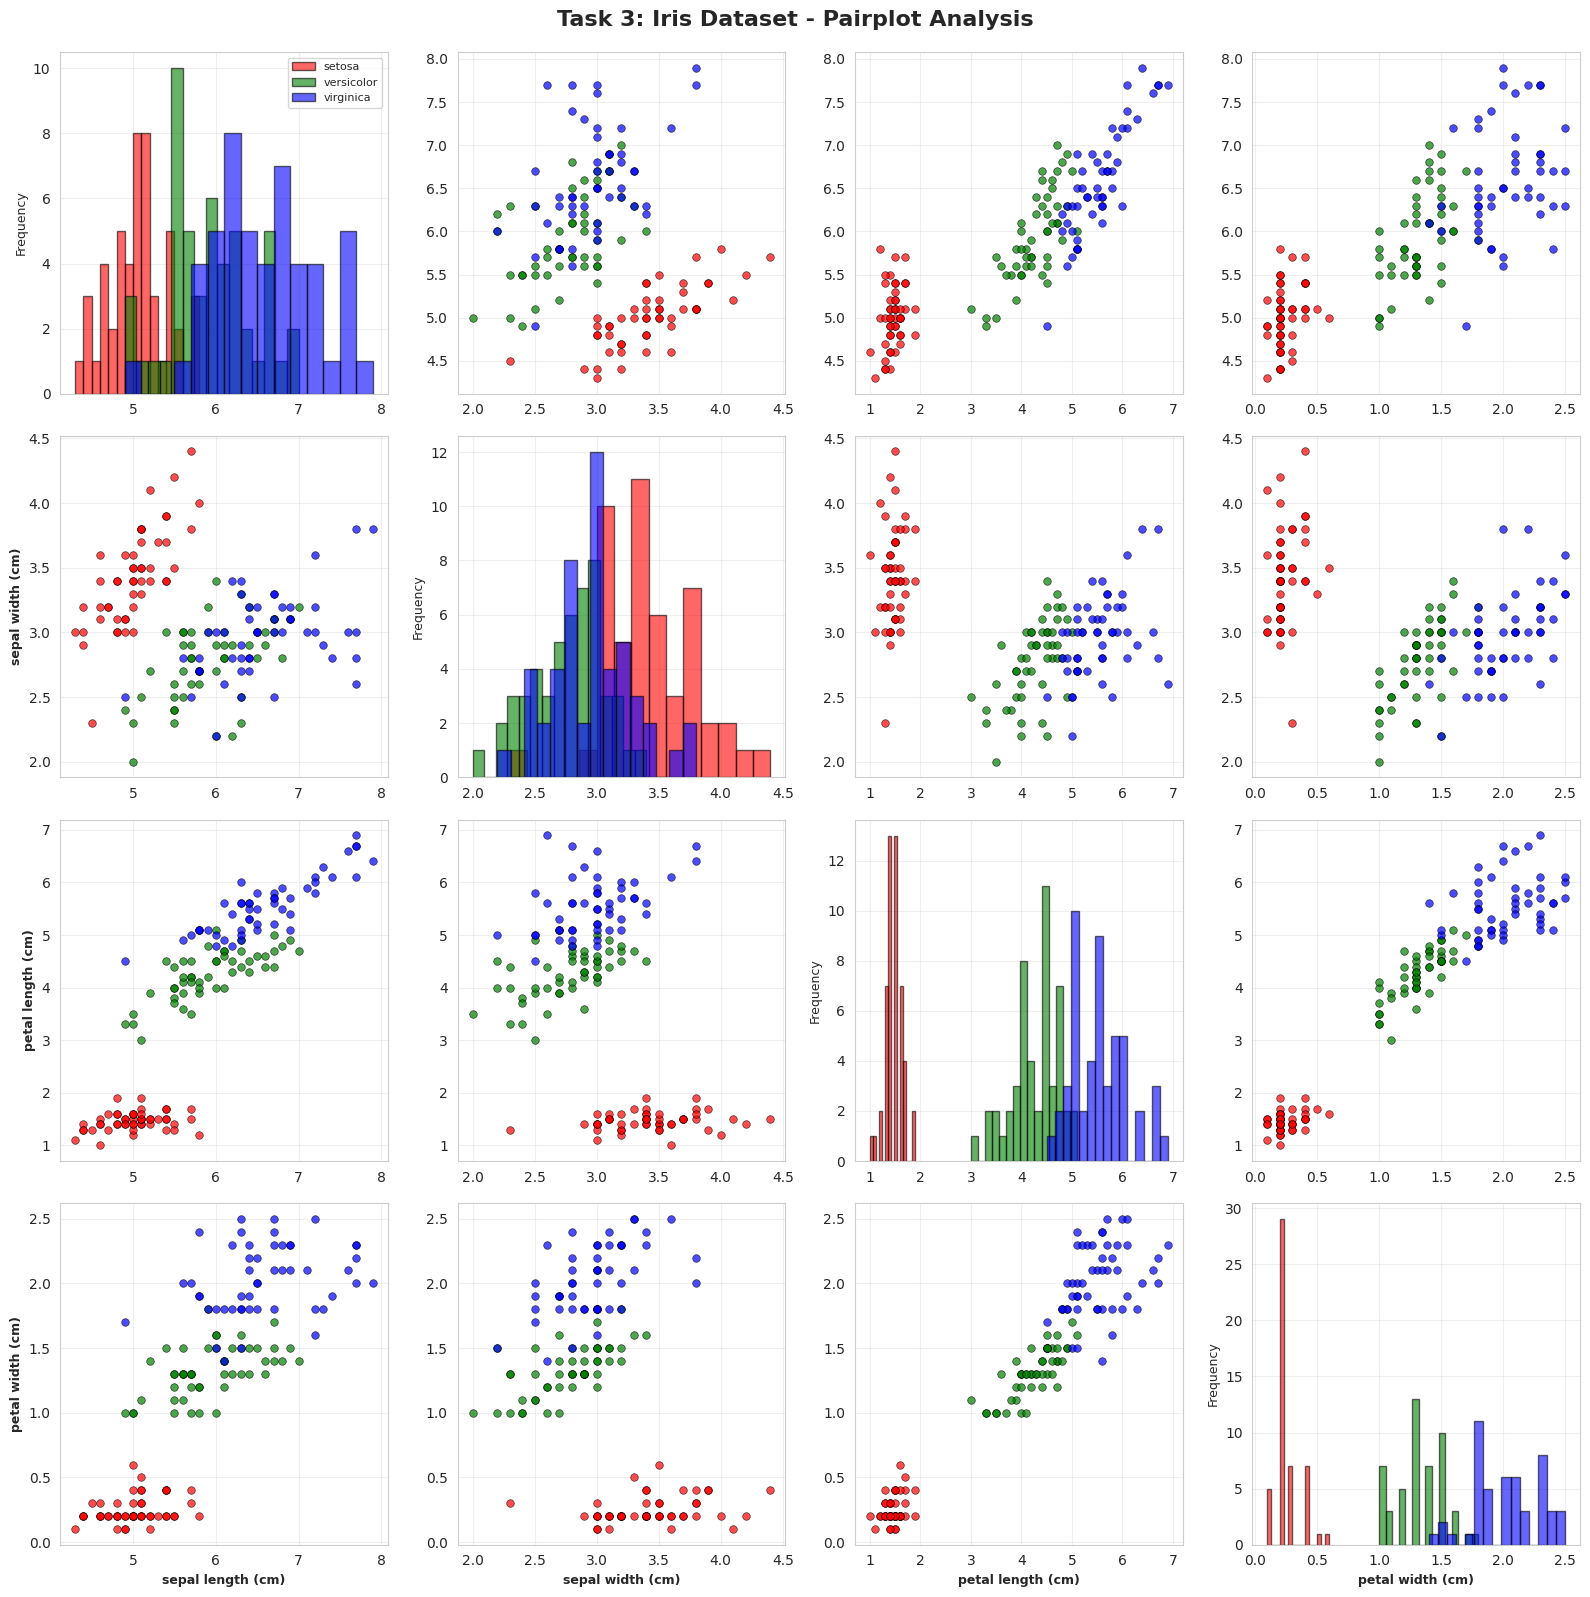

In [26]:
df_iris = pd.DataFrame(X_iris, columns=feature_names)
df_iris['species'] = pd.Categorical.from_codes(y_iris, target_names)

print("\n First 5 samples:")
print(df_iris.head())

# Statistical summary
print("\n Statistical summary:")
print(df_iris.describe())

# Pairplot visualization
print("\n[Task 3] Creating pairplot visualization...")

from pandas.plotting import scatter_matrix

fig, axes = plt.subplots(4, 4, figsize=(16, 16))

species_colors = {'setosa': 'red', 'versicolor': 'green', 'virginica': 'blue'}

for i in range(4):
    for j in range(4):
        ax = axes[i, j]

        if i == j:
            # Diagonal: histogram
            for species in target_names:
                data = df_iris[df_iris['species'] == species].iloc[:, i]
                ax.hist(data, alpha=0.6, label=species, bins=15,
                       color=species_colors[species], edgecolor='black')
            if i == 0:
                ax.legend(fontsize=8)
            ax.set_ylabel('Frequency', fontsize=9)
        else:
            # Off-diagonal: scatter plot
            for species in target_names:
                data = df_iris[df_iris['species'] == species]
                ax.scatter(data.iloc[:, j], data.iloc[:, i],
                          alpha=0.7, s=30, label=species,
                          color=species_colors[species], edgecolors='black', linewidths=0.5)

        if i == 3:
            ax.set_xlabel(feature_names[j], fontsize=9, fontweight='bold')
        if j == 0 and i != j:
            ax.set_ylabel(feature_names[i], fontsize=9, fontweight='bold')

        ax.grid(True, alpha=0.3)

plt.suptitle('Task 3: Iris Dataset - Pairplot Analysis',
             fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.savefig('task3_pairplot.png', dpi=300, bbox_inches='tight')
plt.show()

Apply K-Means clustering (unsupervised)

In [27]:
print("\n[Task 3] Applying K-Means clustering (unsupervised)...")

# Standardize features
scaler = StandardScaler()
X_iris_scaled = scaler.fit_transform(X_iris)

# Try different k values
k_values_iris = [2, 3, 4, 5]
results_iris = {}

for k in k_values_iris:
    km_iris = KMeans(n_clusters=k, init='k-means++', n_init=10,
                     max_iter=300, random_state=42)
    cluster_labels = km_iris.fit_predict(X_iris_scaled)

    silhouette_avg = silhouette_score(X_iris_scaled, cluster_labels)
    inertia = km_iris.inertia_

    results_iris[k] = {
        'labels': cluster_labels,
        'silhouette': silhouette_avg,
        'inertia': inertia,
        'model': km_iris
    }

    print(f"  k={k}: Inertia={inertia:.2f}, Silhouette Score={silhouette_avg:.4f}")


[Task 3] Applying K-Means clustering (unsupervised)...
  k=2: Inertia=222.36, Silhouette Score=0.5818
  k=3: Inertia=139.82, Silhouette Score=0.4599
  k=4: Inertia=114.09, Silhouette Score=0.3869
  k=5: Inertia=90.93, Silhouette Score=0.3459


Elbow method for Iris


[Task 3] Elbow method on Iris dataset...


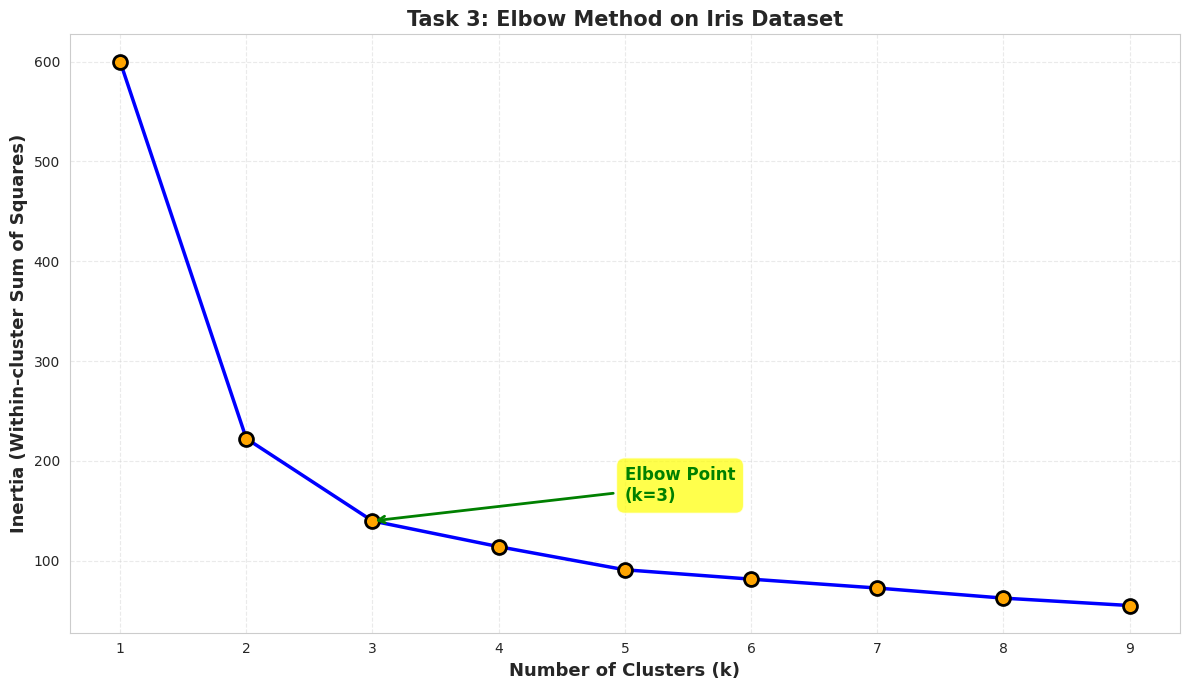

In [28]:
print("\n[Task 3] Elbow method on Iris dataset...")

inertias_iris = []
k_range_iris = range(1, 10)

for k in k_range_iris:
    km = KMeans(n_clusters=k, init='k-means++', n_init=10,
                max_iter=300, random_state=42)
    km.fit(X_iris_scaled)
    inertias_iris.append(km.inertia_)

plt.figure(figsize=(12, 7))
plt.plot(k_range_iris, inertias_iris, 'b-o', linewidth=2.5, markersize=10,
        markerfacecolor='orange', markeredgecolor='black', markeredgewidth=2)
plt.xlabel('Number of Clusters (k)', fontsize=13, fontweight='bold')
plt.ylabel('Inertia (Within-cluster Sum of Squares)', fontsize=13, fontweight='bold')
plt.title('Task 3: Elbow Method on Iris Dataset', fontsize=15, fontweight='bold')
plt.grid(True, alpha=0.4, linestyle='--')
plt.xticks(k_range_iris)

# Annotate elbow
plt.annotate('Elbow Point\n(k=3)',
            xy=(3, inertias_iris[2]),
            xytext=(5, inertias_iris[2] + 20),
            arrowprops=dict(arrowstyle='->', lw=2, color='green'),
            fontsize=12, fontweight='bold', color='green',
            bbox=dict(boxstyle='round,pad=0.5', facecolor='yellow', alpha=0.7))

plt.tight_layout()
plt.savefig('task3_elbow_method.png', dpi=300, bbox_inches='tight')
plt.show()


Best clustering visualization (k=3)


[Task 3] Visualizing best clustering (k=3)...


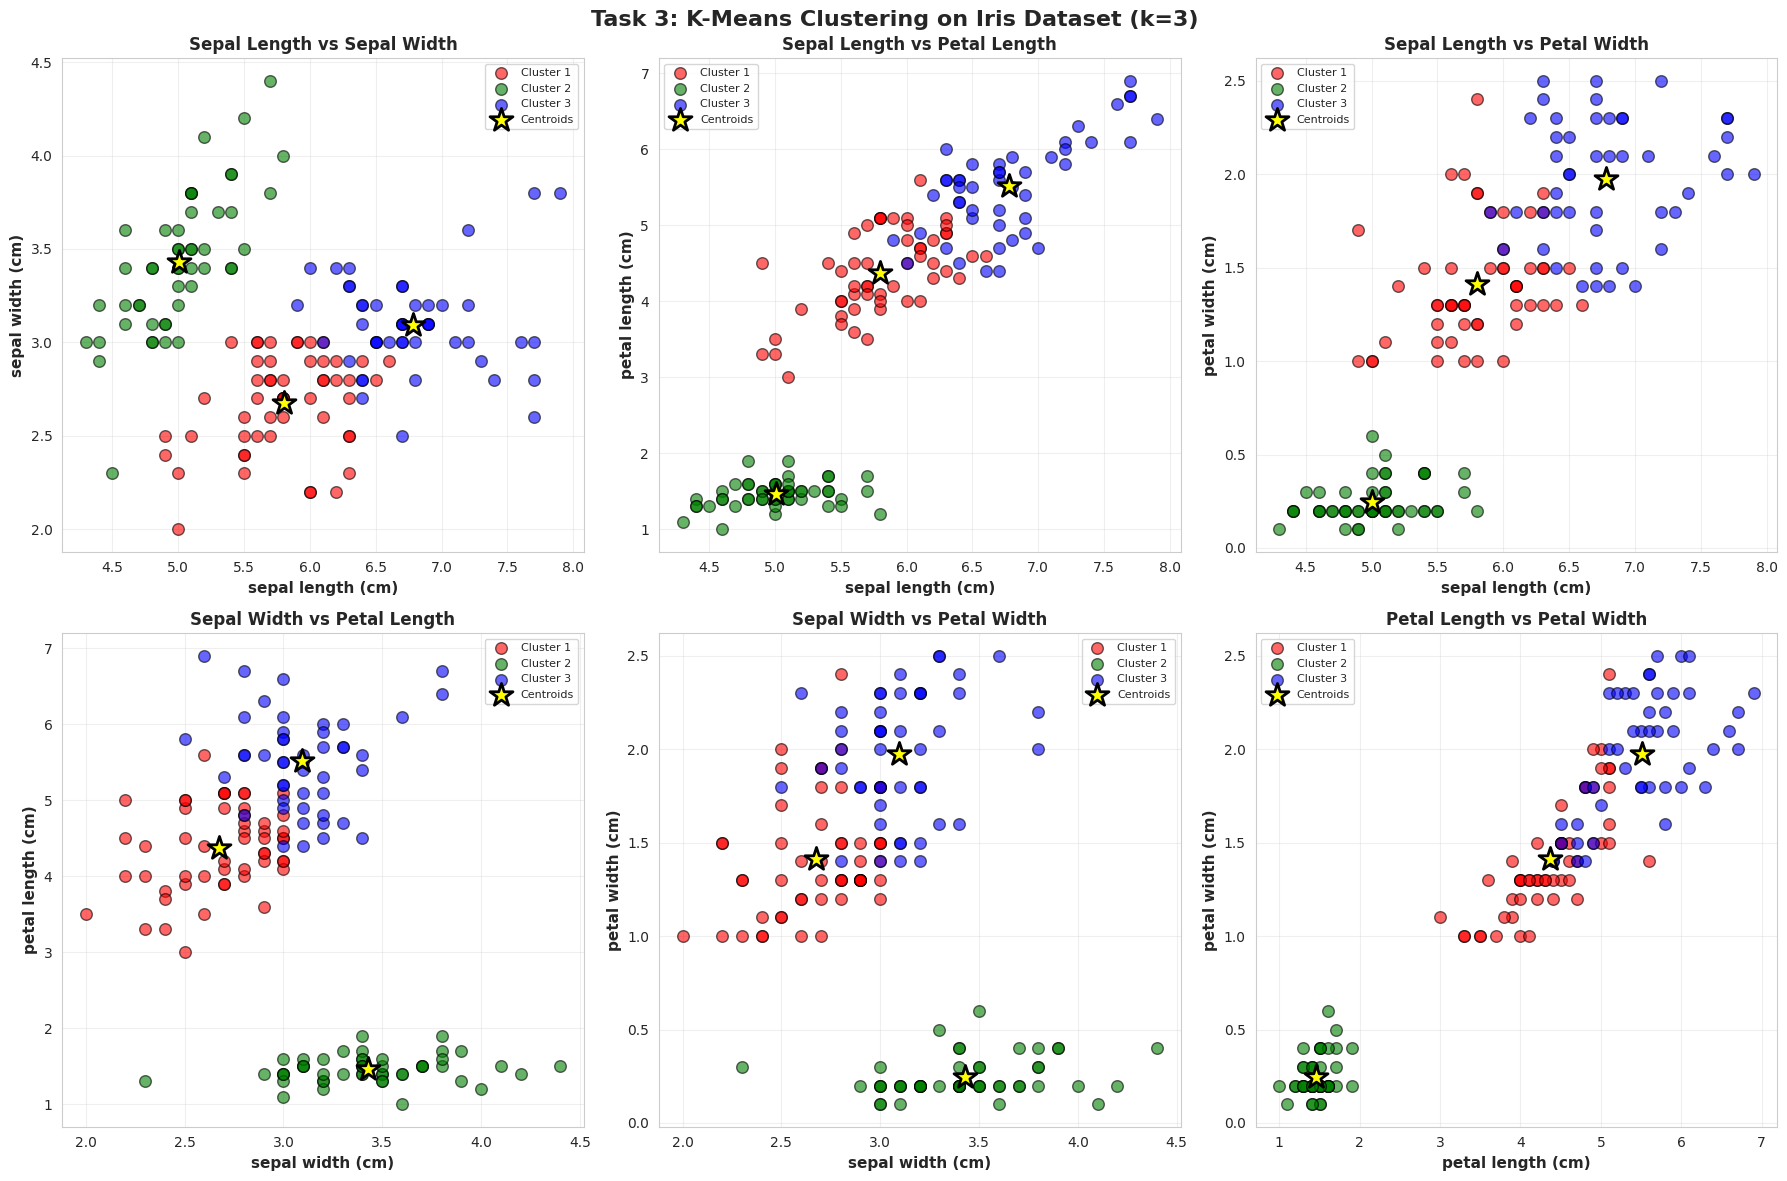

In [29]:
print("\n[Task 3] Visualizing best clustering (k=3)...")

best_k = 3
best_labels = results_iris[best_k]['labels']

# Visualize on different feature pairs
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

feature_pairs = [
    (0, 1, 'Sepal Length vs Sepal Width'),
    (0, 2, 'Sepal Length vs Petal Length'),
    (0, 3, 'Sepal Length vs Petal Width'),
    (1, 2, 'Sepal Width vs Petal Length'),
    (1, 3, 'Sepal Width vs Petal Width'),
    (2, 3, 'Petal Length vs Petal Width')
]

cluster_colors = ['red', 'green', 'blue']

for idx, (f1, f2, title) in enumerate(feature_pairs):
    ax = axes[idx // 3, idx % 3]

    # Plot clusters
    for cluster in range(best_k):
        mask = best_labels == cluster
        ax.scatter(X_iris[mask, f1], X_iris[mask, f2],
                  c=cluster_colors[cluster], marker='o', s=70,
                  alpha=0.6, edgecolors='black', linewidths=1,
                  label=f'Cluster {cluster+1}')

    # Plot centroids (descaled)
    centroids_descaled = scaler.inverse_transform(results_iris[best_k]['model'].cluster_centers_)
    ax.scatter(centroids_descaled[:, f1], centroids_descaled[:, f2],
              s=300, marker='*', c='yellow', edgecolor='black',
              linewidths=2, label='Centroids', zorder=10)

    ax.set_xlabel(feature_names[f1], fontsize=11, fontweight='bold')
    ax.set_ylabel(feature_names[f2], fontsize=11, fontweight='bold')
    ax.set_title(title, fontsize=12, fontweight='bold')
    ax.legend(fontsize=8, loc='best')
    ax.grid(True, alpha=0.3)

plt.suptitle('Task 3: K-Means Clustering on Iris Dataset (k=3)',
             fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('task3_clustering_visualization.png', dpi=300, bbox_inches='tight')
plt.show()

Comparison with true labels


[Task 3] Comparing clustering with true species labels...


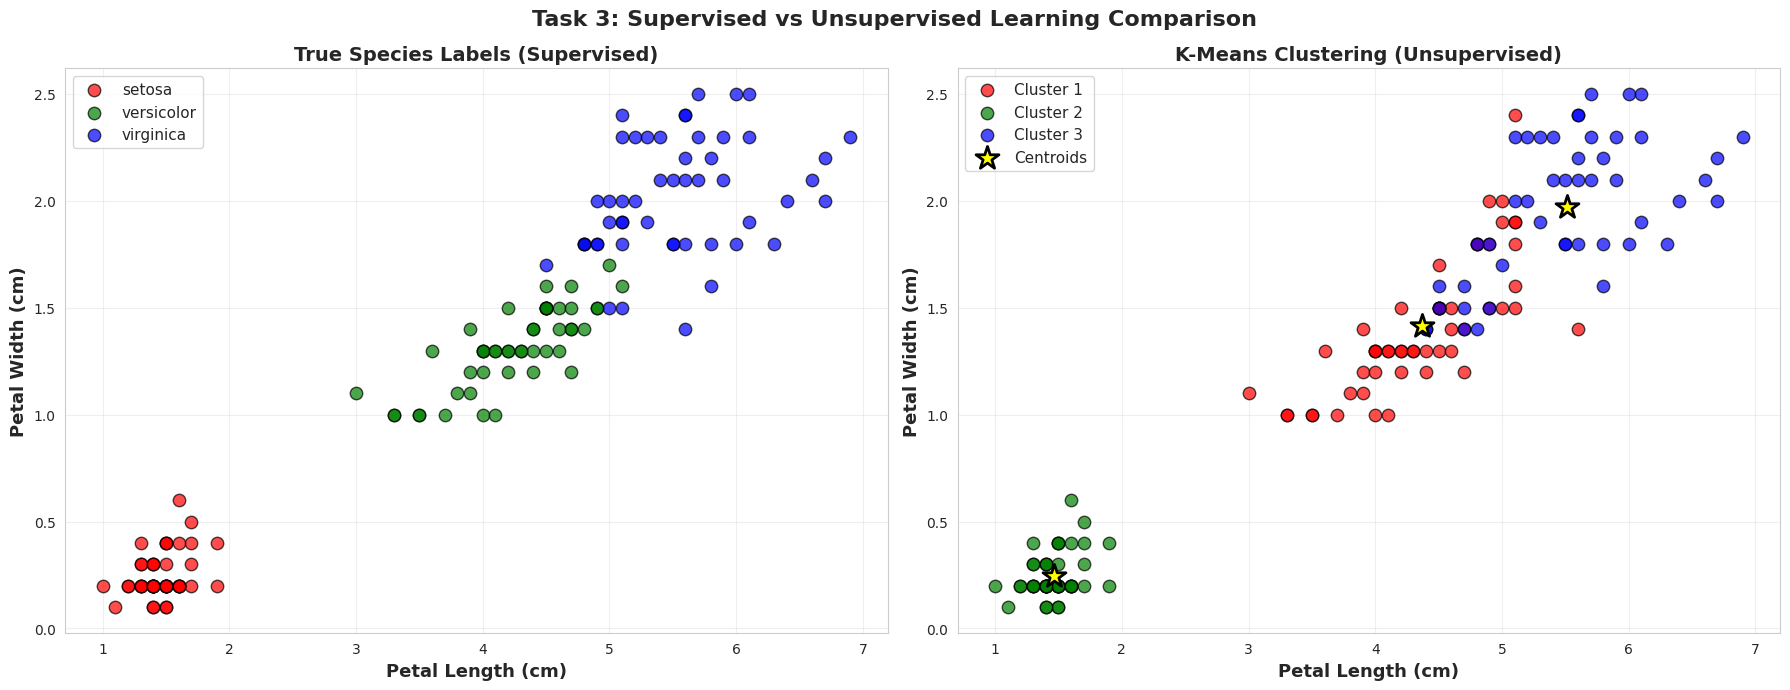

In [30]:
print("\n[Task 3] Comparing clustering with true species labels...")

fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# True labels
for idx, species in enumerate(target_names):
    mask = y_iris == idx
    axes[0].scatter(X_iris[mask, 2], X_iris[mask, 3],
                   c=species_colors[species], marker='o', s=80,
                   alpha=0.7, edgecolors='black', linewidths=1,
                   label=species)

axes[0].set_xlabel('Petal Length (cm)', fontsize=13, fontweight='bold')
axes[0].set_ylabel('Petal Width (cm)', fontsize=13, fontweight='bold')
axes[0].set_title('True Species Labels (Supervised)', fontsize=14, fontweight='bold')
axes[0].legend(fontsize=11)
axes[0].grid(True, alpha=0.3)

# Clustering results
for cluster in range(best_k):
    mask = best_labels == cluster
    axes[1].scatter(X_iris[mask, 2], X_iris[mask, 3],
                   c=cluster_colors[cluster], marker='o', s=80,
                   alpha=0.7, edgecolors='black', linewidths=1,
                   label=f'Cluster {cluster+1}')

centroids_descaled = scaler.inverse_transform(results_iris[best_k]['model'].cluster_centers_)
axes[1].scatter(centroids_descaled[:, 2], centroids_descaled[:, 3],
               s=300, marker='*', c='yellow', edgecolor='black',
               linewidths=2, label='Centroids', zorder=10)

axes[1].set_xlabel('Petal Length (cm)', fontsize=13, fontweight='bold')
axes[1].set_ylabel('Petal Width (cm)', fontsize=13, fontweight='bold')
axes[1].set_title('K-Means Clustering (Unsupervised)', fontsize=14, fontweight='bold')
axes[1].legend(fontsize=11)
axes[1].grid(True, alpha=0.3)

plt.suptitle('Task 3: Supervised vs Unsupervised Learning Comparison',
             fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('task3_supervised_vs_unsupervised.png', dpi=300, bbox_inches='tight')
plt.show()

Confusion matrix-like analysis


[Task 3] Cluster composition analysis...

 Cluster Composition:
Predicted Cluster  Cluster 1  Cluster 2  Cluster 3
True Species                                      
setosa                     0         50          0
versicolor                39          0         11
virginica                 14          0         36


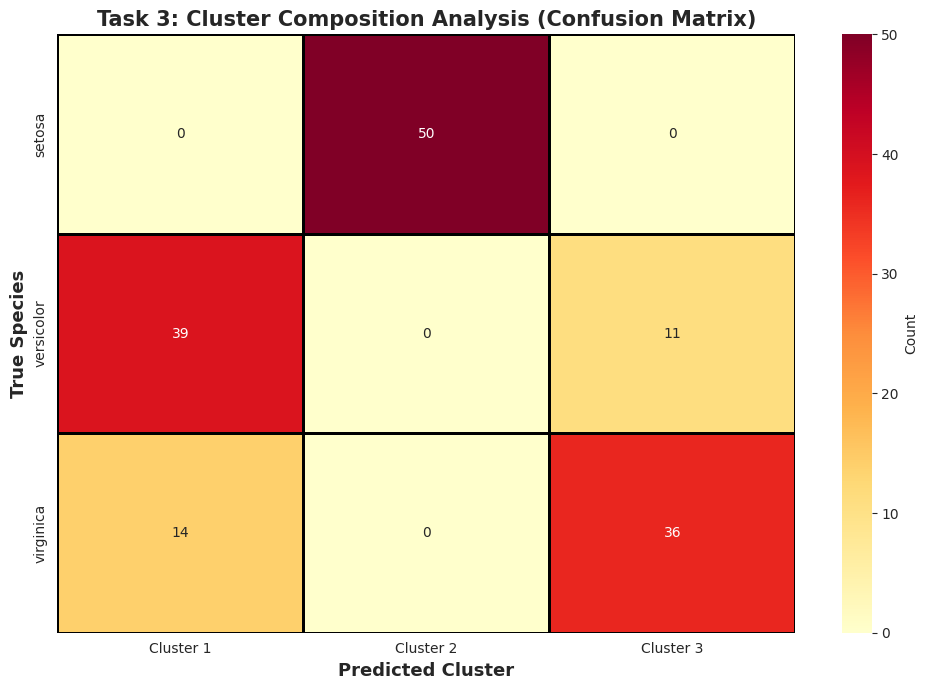

In [31]:
print("\n[Task 3] Cluster composition analysis...")

confusion_df = pd.DataFrame({
    'True Species': [target_names[label] for label in y_iris],
    'Predicted Cluster': [f'Cluster {c+1}' for c in best_labels]
})

confusion_table = pd.crosstab(confusion_df['True Species'],
                               confusion_df['Predicted Cluster'])

print("\n Cluster Composition:")
print(confusion_table)

plt.figure(figsize=(10, 7))
sns.heatmap(confusion_table, annot=True, fmt='d', cmap='YlOrRd',
           cbar_kws={'label': 'Count'}, linewidths=1, linecolor='black')
plt.xlabel('Predicted Cluster', fontsize=13, fontweight='bold')
plt.ylabel('True Species', fontsize=13, fontweight='bold')
plt.title('Task 3: Cluster Composition Analysis (Confusion Matrix)',
         fontsize=15, fontweight='bold')
plt.tight_layout()
plt.savefig('task3_confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

3D Visualization using PCA


[Task 3] 3D visualization using first 3 features...


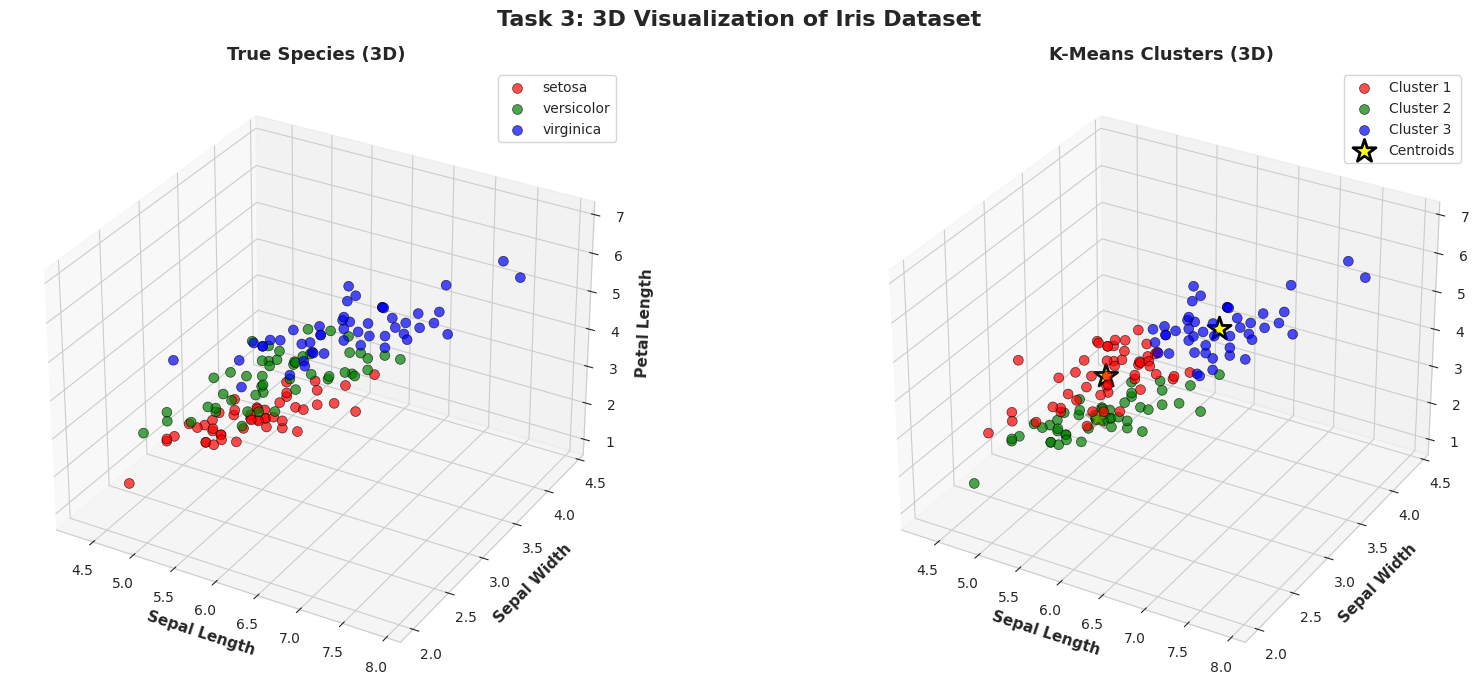

In [32]:
print("\n[Task 3] 3D visualization using first 3 features...")

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(18, 7))

# True labels in 3D
ax1 = fig.add_subplot(121, projection='3d')

for idx, species in enumerate(target_names):
    mask = y_iris == idx
    ax1.scatter(X_iris[mask, 0], X_iris[mask, 1], X_iris[mask, 2],
               c=species_colors[species], marker='o', s=50,
               alpha=0.7, edgecolors='black', linewidths=0.5,
               label=species)

ax1.set_xlabel('Sepal Length', fontsize=11, fontweight='bold')
ax1.set_ylabel('Sepal Width', fontsize=11, fontweight='bold')
ax1.set_zlabel('Petal Length', fontsize=11, fontweight='bold')
ax1.set_title('True Species (3D)', fontsize=13, fontweight='bold')
ax1.legend(fontsize=10)

# Clustering results in 3D
ax2 = fig.add_subplot(122, projection='3d')

for cluster in range(best_k):
    mask = best_labels == cluster
    ax2.scatter(X_iris[mask, 0], X_iris[mask, 1], X_iris[mask, 2],
               c=cluster_colors[cluster], marker='o', s=50,
               alpha=0.7, edgecolors='black', linewidths=0.5,
               label=f'Cluster {cluster+1}')

# Plot centroids
centroids_descaled = scaler.inverse_transform(results_iris[best_k]['model'].cluster_centers_)
ax2.scatter(centroids_descaled[:, 0], centroids_descaled[:, 1], centroids_descaled[:, 2],
           s=300, marker='*', c='yellow', edgecolor='black',
           linewidths=2, label='Centroids')

ax2.set_xlabel('Sepal Length', fontsize=11, fontweight='bold')
ax2.set_ylabel('Sepal Width', fontsize=11, fontweight='bold')
ax2.set_zlabel('Petal Length', fontsize=11, fontweight='bold')
ax2.set_title('K-Means Clusters (3D)', fontsize=13, fontweight='bold')
ax2.legend(fontsize=10)

plt.suptitle('Task 3: 3D Visualization of Iris Dataset',
             fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('task3_3d_visualization.png', dpi=300, bbox_inches='tight')
plt.show()

**SUMMARY**

In [33]:
print("\n TASK 1 RESULTS:")
print(f"   - Generated and clustered synthetic data (3 clusters)")
print(f"   - Elbow method confirmed optimal k=3")
print(f"   - Best silhouette score: {max(silhouette_scores):.4f} at k={k_values[np.argmax(silhouette_scores)]}")
print(f"   - Compared good (k=5) vs bad (k=2) clustering for 5-cluster data")

print("\n TASK 2 RESULTS:")
print(f"   - Implemented K-Means in TensorFlow")
print(f"   - Ran {iteration_n} iterations with convergence tracking")
print(f"   - Final SSE: {sse_history[-1]:.2f}" if 'sse_history' in locals() else "   - TensorFlow not available")

print("\n TASK 3 RESULTS:")
print(f"   - Analyzed Iris dataset (150 samples, 4 features, 3 species)")
print(f"   - Applied unsupervised K-Means clustering")
print(f"   - Optimal k=3 (matches true number of species)")
print(f"   - Best silhouette score: {results_iris[3]['silhouette']:.4f}")
print(f"   - Visualized in 2D and 3D space")
print(f"   - Compared supervised (true labels) vs unsupervised (clusters)")


print("\n" + "="*80)
print("OBSERVATIONS:")
print("="*80)

print("1. Elbow method and silhouette analysis are effective for determining optimal k")
print("2. K-Means works well for spherical, well-separated clusters")
print("3. Standardization is important for features with different scales")
print("4. Unsupervised clustering on Iris closely matches supervised labels")
print("5. Petal features (length & width) are most discriminative for Iris species")


 TASK 1 RESULTS:
   - Generated and clustered synthetic data (3 clusters)
   - Elbow method confirmed optimal k=3
   - Best silhouette score: 0.7143 at k=3
   - Compared good (k=5) vs bad (k=2) clustering for 5-cluster data

 TASK 2 RESULTS:
   - Implemented K-Means in TensorFlow
   - Ran 100 iterations with convergence tracking
   - Final SSE: 1183.98

 TASK 3 RESULTS:
   - Analyzed Iris dataset (150 samples, 4 features, 3 species)
   - Applied unsupervised K-Means clustering
   - Optimal k=3 (matches true number of species)
   - Best silhouette score: 0.4599
   - Visualized in 2D and 3D space
   - Compared supervised (true labels) vs unsupervised (clusters)

OBSERVATIONS:
1. Elbow method and silhouette analysis are effective for determining optimal k
2. K-Means works well for spherical, well-separated clusters
3. Standardization is important for features with different scales
4. Unsupervised clustering on Iris closely matches supervised labels
5. Petal features (length & width) are 